# Homework #1: AB-testing<br>and the Multi-Armed Bayesian Bandit

### You have three choices... choose wisely, my friends...


|Option|The "Red" one|The "Blue" one|The "Other" one|
|-|-|-|-|
|Unknown Probability of Success|$\theta_A$ | $\theta_B$ | $\theta_C$ |

$$p(\theta_j|x_j,n_j) \propto \theta^{x_j+\alpha_j-1}(1-\theta_j)^{n-x+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$

- Try one out, and collect that data update...
    - What's the data? 
    - What's the update for the posterior in question?
- Which one of the three choices will you try out? How will you choose? 


- Hints: <u>You can use *simulation* to find out the *relative belief* (i.e., probability) that each of the choices is the best.</u> Posterior distributions characterize your beliefs about the parameters $\theta_A, \theta_B$ and $\theta_C$. What can you learn by repeatedly sampling values from the posterior distribution while comparing the values of each triplet? If you know the chances that A, B, and C are the best choice, how could you balance ***exploration versus exploitation*** when choosing which of the possible options to collect the next data point on next?

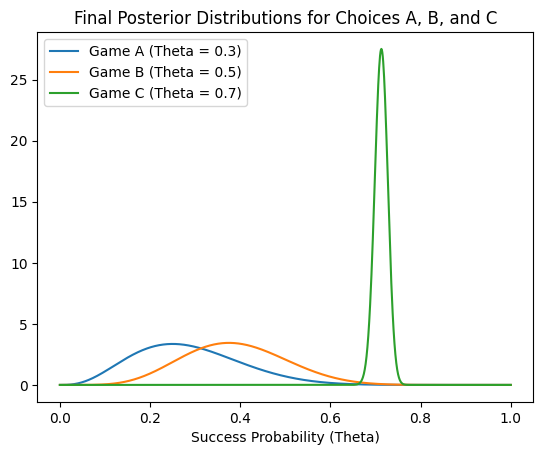

In [283]:
# Import Packages
import matplotlib.pyplot as plt
from scipy import stats
import random

# Initialize Parameters
alpha = 1
beta = 1
trials = 1000

# True Thetas (we select 0.3, 0.5, 0.7)
true_thetas = [0.3, 0.5, 0.7]

# Initialize the Storing Variables
na, xa, nb, xb, nc, xc = 0, 0, 0, 0, 0, 0

parameter_domain = np.linspace(0,1,1001)

# Play for given trials
for i in range(trials):
    # Sample randomly from each Posterior Distribution (The Initial Distribution is Uniform given alpha and beta =1)
    theta_A = stats.beta(a = xa + alpha, b = na - xa + beta).rvs(size = 1)
    theta_B = stats.beta(a = xb + alpha, b = nb - xb + beta).rvs(size = 1)
    theta_C = stats.beta(a = xc + alpha, b = nc - xc + beta).rvs(size = 1)

    # Store the variables in a List and Choose the Maximum Theta i.e. selecting the game to play
    # In the first run, since distributions are the same, this would be similar to random sampling
    thetas = [theta_A, theta_B, theta_C]
    max_value = max(thetas)
    choice = thetas.index(max_value)

    # Given the selected game, we play it:
    # We first update the number of times the chosen game is played
    # We then play the game with its true parameter in a Bernoulli distribution
    # Only if the game succeeds (result of Bernoulli == 1), we update the number of wins it has.
    # Updating both the number of games played and the number of successes allows us to update and shift the posterior distribution.
    if choice == 0:
        na += 1
        if stats.binom(n=1, p = true_thetas[0]).rvs(size=1) == 1:
            xa += 1
    elif choice == 1:
        nb += 1
        if stats.binom(n=1, p = true_thetas[1]).rvs(size=1) == 1:
            xb += 1
    else:
        nc += 1
        if stats.binom(n=1, p = true_thetas[2]).rvs(size=1) == 1:
            xc += 1

# Plotting the Final Posteriors
posterior_a = stats.beta(a = xa + alpha, b = na - xa + beta).pdf(parameter_domain)
posterior_b = stats.beta(a = xb + alpha, b = nb - xb + beta).pdf(parameter_domain)
posterior_c = stats.beta(a = xc + alpha, b = nc - xc + beta).pdf(parameter_domain)


plt.plot(parameter_domain, posterior_a, label = "Game A (Theta = {})".format(true_thetas[0]))
plt.plot(parameter_domain, posterior_b, label = "Game B (Theta = {})".format(true_thetas[1]))
plt.plot(parameter_domain, posterior_c, label = "Game C (Theta = {})".format(true_thetas[2]))

plt.title('Final Posterior Distributions for Options A, B, and C')
plt.xlabel('Success Probability (Theta)')
plt.legend()
plt.show()

## What is the data?

In the context of Bayesian statistics, the "data" refers to the specific outcomes of the trials for each option—the number of successes (chosen by a Bernoulli distribution) and the total number of trials (the number of times the game was chosen to play). The data is used to update the beliefs about the probability of success ($\theta$) for each option through updating the posterior distribution.

## What's the update for the posterior in question?

The update for the posteriors in question involves combining our prior beliefs (expressed as a Beta distribution) with the new information provided by the observed data (the successes and failures of playing a game). If the trial is a success, the alpha parameter of the corresponding option is increased by 1, and if it's a failure, the beta parameter is increased by 1.

## Which one of the three choices will you try out? How will you choose?

The algorithm employs Thompson Sampling, which involves sampling from the posterior distributions of each game or option. The algorithm first selects the option with the highest sampled value from the prior distributions (in this case the priors are identical uniform distributions which implies that the algorithm randomly selects a game). Subsequently, the chosen distribution is 'played,' meaning observable data (successes, total played) is generated from the Bernoulli distribution with its true theta. This data is then utilized to update the corresponding posterior distribution for that option. This picking and choosing is essentially the algorithm balancing exploration (by trying different options through random selection in the distributions) and exploitation (by choosing options with higher believed successes). As more information is revealed by playing more trials, this shrinks the distribution and reflects an updated and more precise understanding of the underlying probability of success for that particular option (in this case, option C with a probability of 0.7 success).